In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analyse

L'objectif de ce notebook est de tenter de determiner un "pattern" pour savoir si un joueur sera drafté ou non

In [2]:
df = pd.read_csv("cleaned_analysis_ncaa.csv")
df.shape

(20549, 53)

On sépare en deux : les joueurs non draftés en fin de carrière universitaires des joueurs draftés

In [3]:
df_drafted = df.loc[df["drafted"] == 1]
df_non_drafted = df.loc[df["drafted"] == 0]

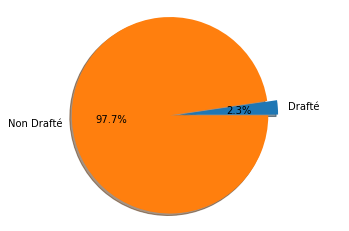

In [4]:
# La part des universitaires devenus pros entre 2010 - 2019
labels = 'Drafté', 'Non Drafté'
sizes = [df_drafted.shape[0], df_non_drafted.shape[0]]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Seulement 2.3% des joueurs sont draftés

### Position du joueur

In [5]:
def players_by_position(df,pos):
    return df.loc[df["position"] == pos]

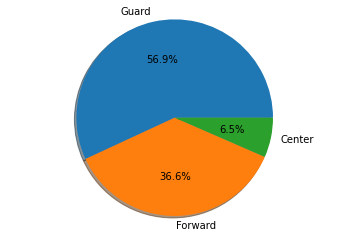

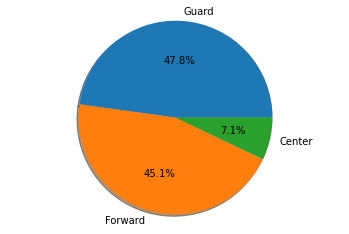

In [6]:
# Les joueurs par positions
labels = 'Guard', 'Forward', 'Center'
sizes = [players_by_position(df,x).shape[0] for x in labels]
explode = (0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

sizes = [players_by_position(df_drafted,x).shape[0] for x in labels]
explode = (0, 0, 0) 

fig1, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax2.axis('equal')
plt.show()

On remarque qu'en NCAA, il y a plus de "guards" que de "forward" ou "center" mais les équipes NBA
ont plus tendance à drafter des forwards.  
Serait-il une question de taille ?

In [7]:
def comparer_ncaa_drafted(category) :
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,  figsize=(18,16))
    fig.suptitle(f'Répartition des {category} par position', fontsize = 15)

    players = ['ncaa', 'drafted']

    ax1.hist(df.loc[df["position"] == 'Guard',category], density = True)
    ax2.hist(df.loc[df["position"] == 'Forward',category], density = True)
    ax3.hist(df.loc[df["position"] == 'Center',category], density = True)

    ax1.hist(df_drafted.loc[df_drafted["position"] == 'Guard', category], density = True, alpha = 0.5)
    ax2.hist(df_drafted.loc[df_drafted["position"] == 'Forward',category], density = True, alpha = 0.5)
    ax3.hist(df_drafted.loc[df_drafted["position"] == 'Center',category], density = True, alpha = 0.5)

    fig.text(0.5, 0.04, category, ha='center', va='center')

    ax1.set_title('Guard')
    ax2.set_title('Forward')
    ax3.set_title('Center')


    plt.show()

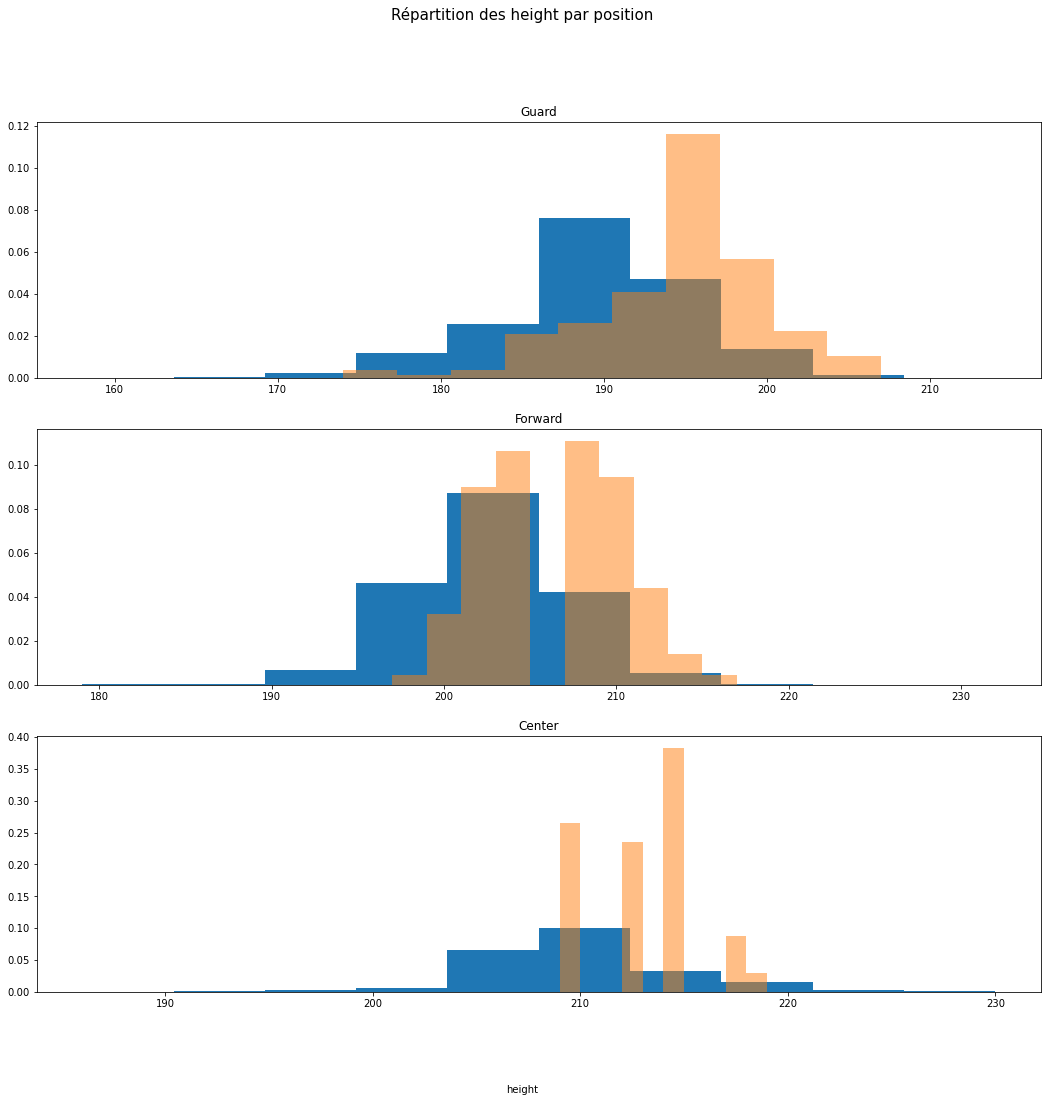

In [8]:
comparer_ncaa_drafted("height")

On peut déduire que les joueurs draftés ont tendance à être plus grand que la moyenne. 
On peut conclure que la taille d'un joueur est un facteur déterminant pour passer professionnel.

### Poids

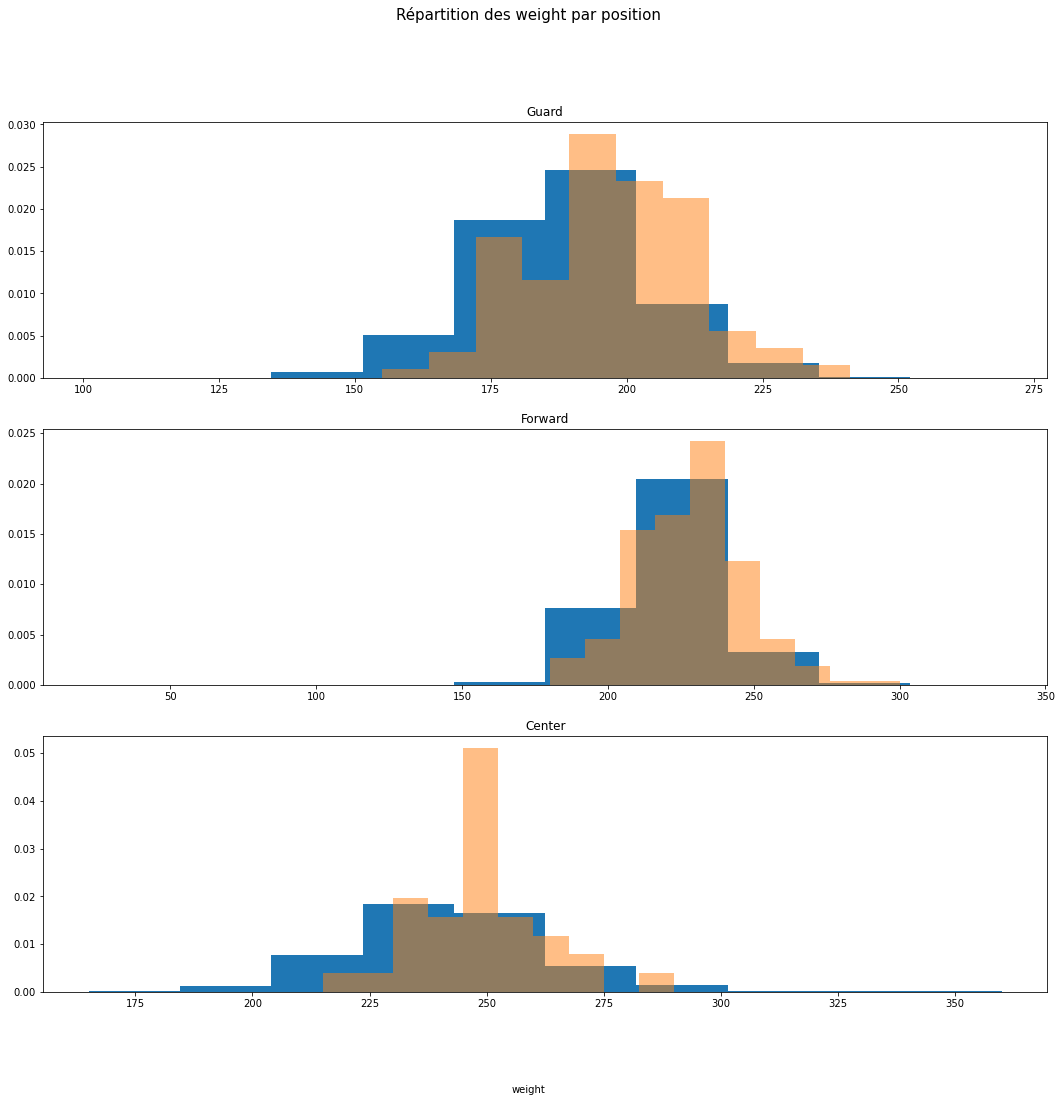

In [9]:
comparer_ncaa_drafted("weight")

Le poids d'un joueur ne semble pas être un paramètre

### Statistiques de bases

In [10]:
stats = ["assists","points","total_rebounds","blocks","steals"]
for s in stats :
    df[s] = df[s] / df["games_played"]

In [48]:
s = "minutes_played"
df[s] = df[s] / df["games_played"]

In [11]:
stats = ["assists","points","total_rebounds","blocks","steals"]
for s in stats :
    df_drafted[s] = df_drafted[s] / df_drafted["games_played"]

<ipython-input-11-cc2a9d1ecce0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drafted[s] = df_drafted[s] / df_drafted["games_played"]


#### Points

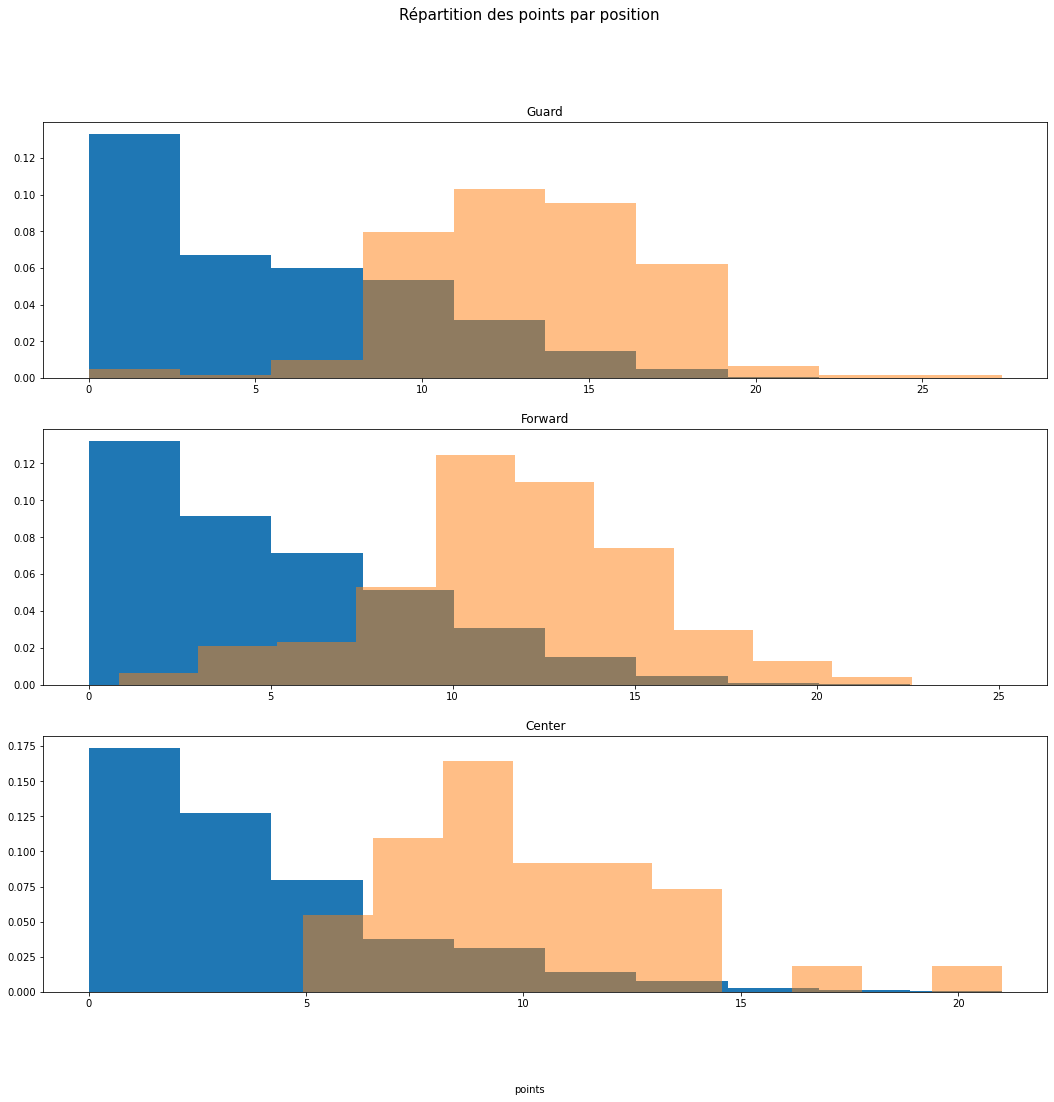

In [12]:
comparer_ncaa_drafted("points")

In [13]:
#### Assists

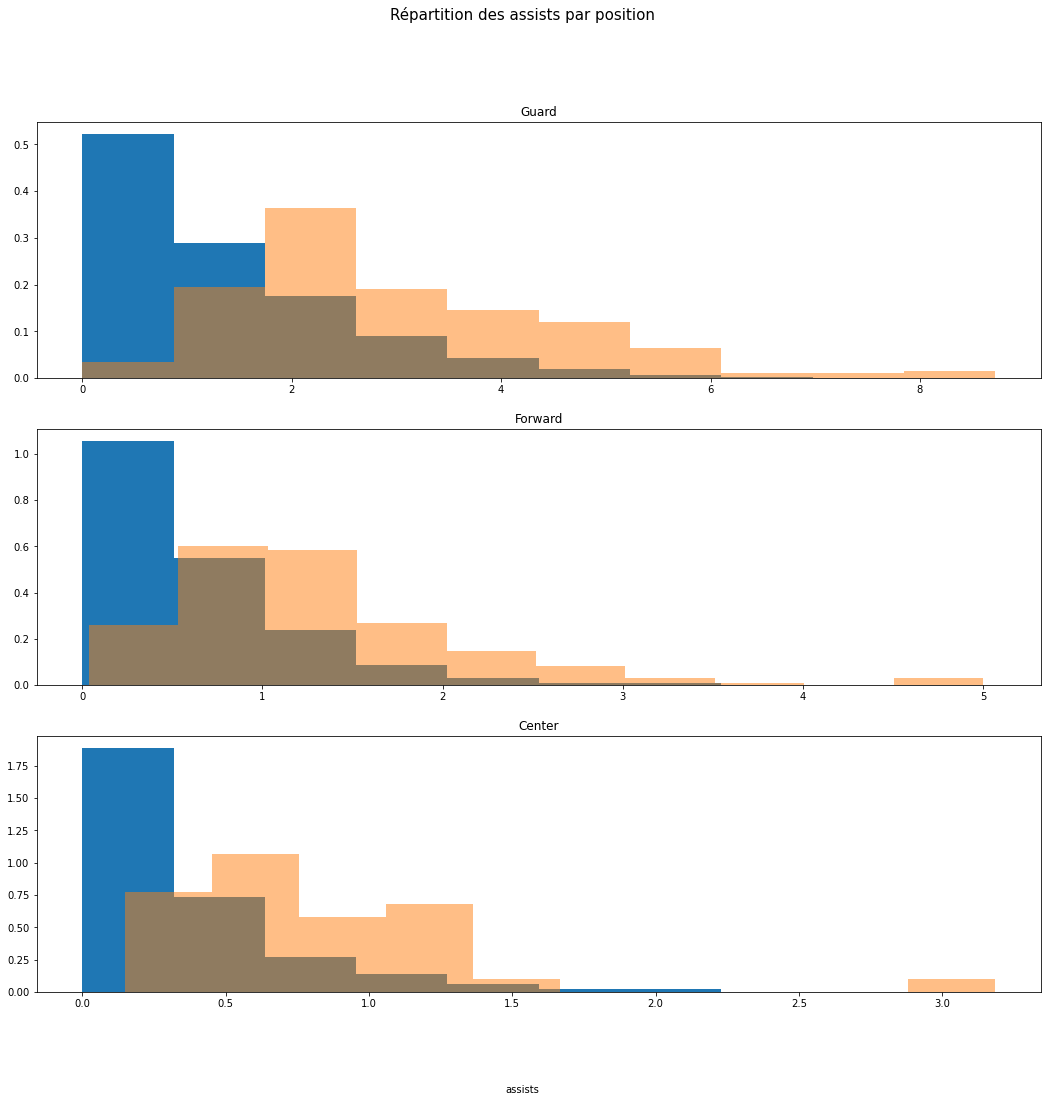

In [14]:
comparer_ncaa_drafted("assists")

In [15]:
#### Rebonds

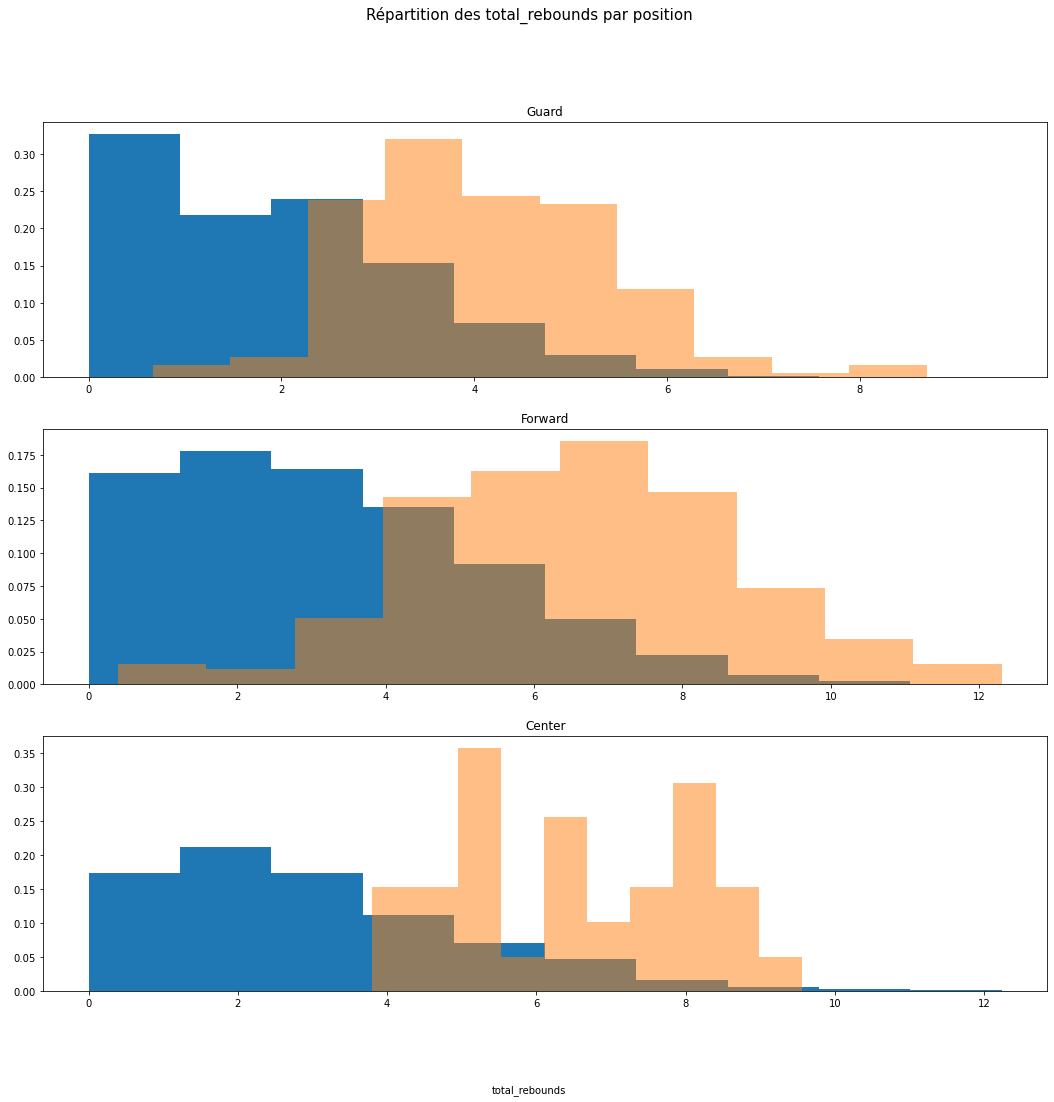

In [16]:
comparer_ncaa_drafted("total_rebounds")

In [17]:
#### Interception

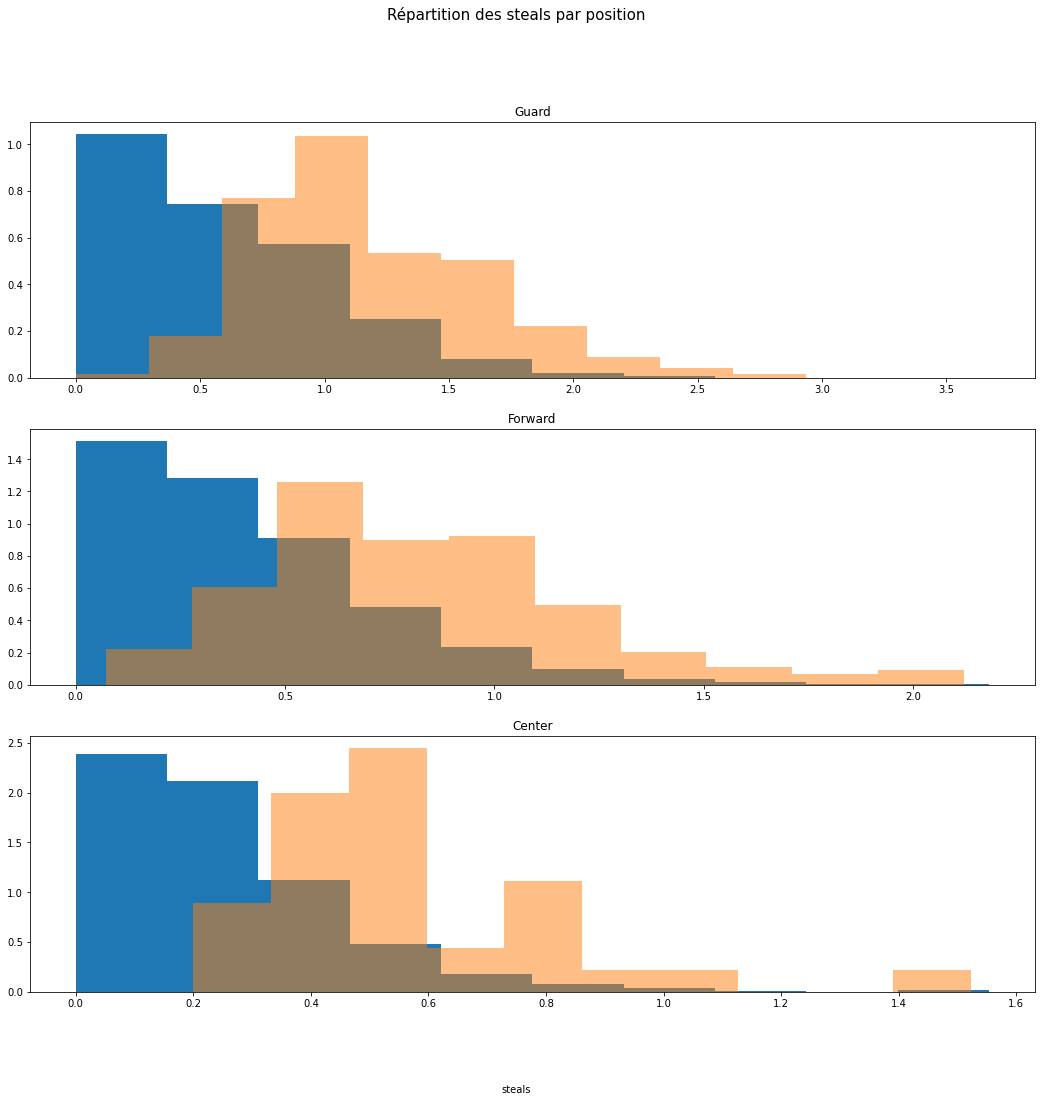

In [18]:
comparer_ncaa_drafted("steals")

In [19]:
#### blocks

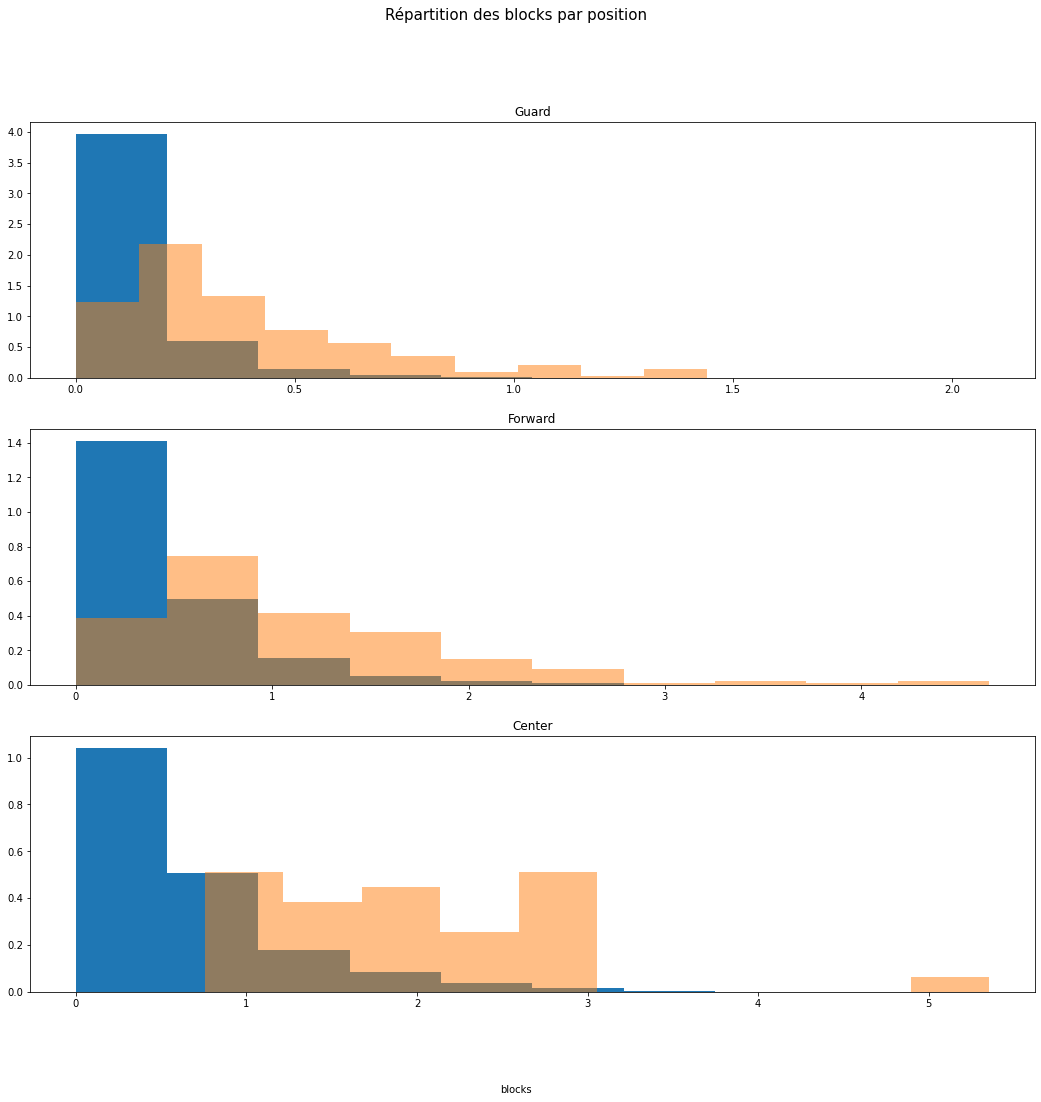

In [20]:
comparer_ncaa_drafted("blocks")

In [21]:
### Tirs

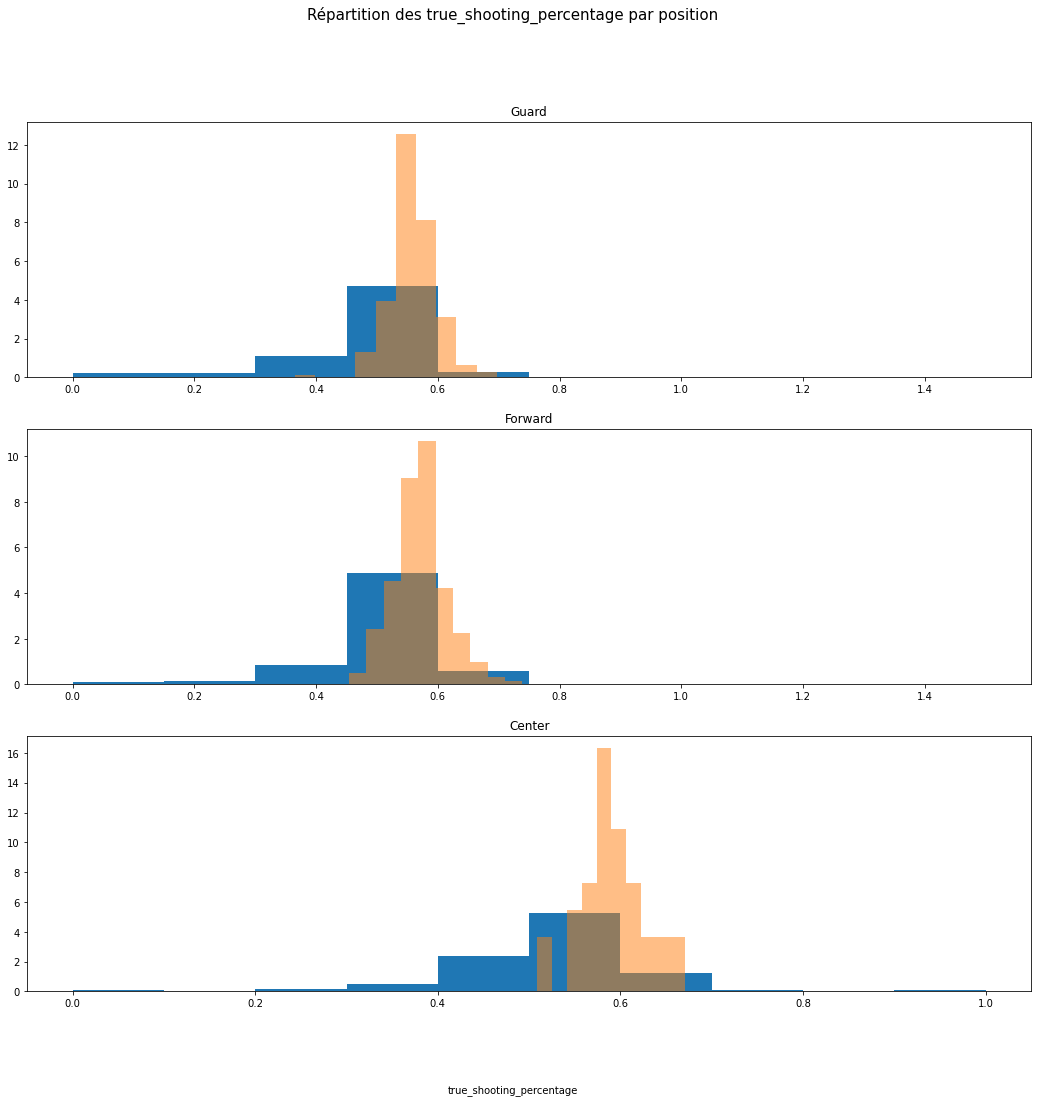

In [22]:
comparer_ncaa_drafted("true_shooting_percentage")

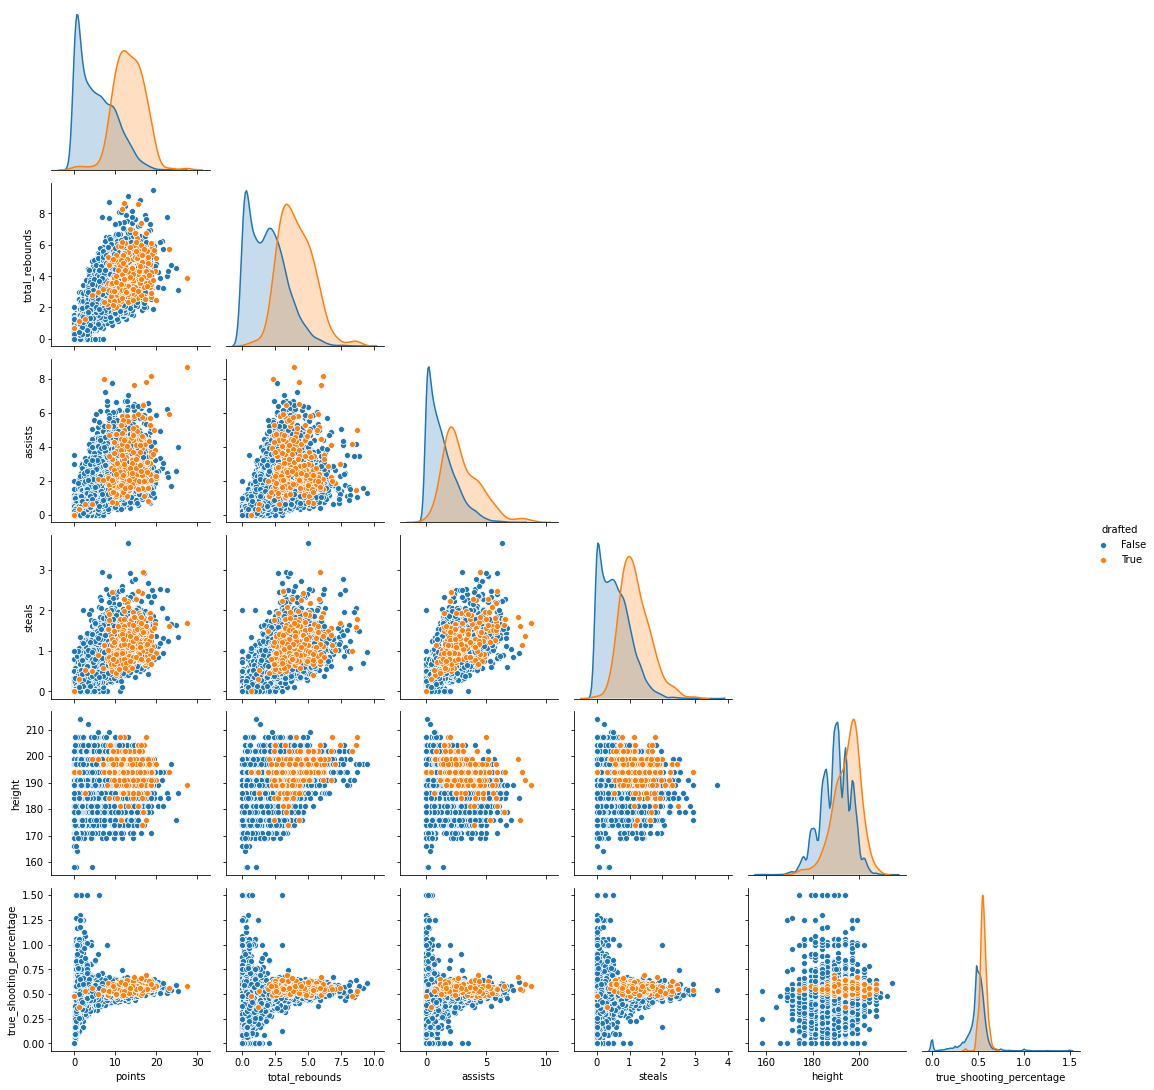

In [36]:
sns.pairplot(df.loc[df["position"] == 'Guard'][["points",'total_rebounds', "assists", "steals","height",'true_shooting_percentage',"drafted"]],corner = True, hue = "drafted")

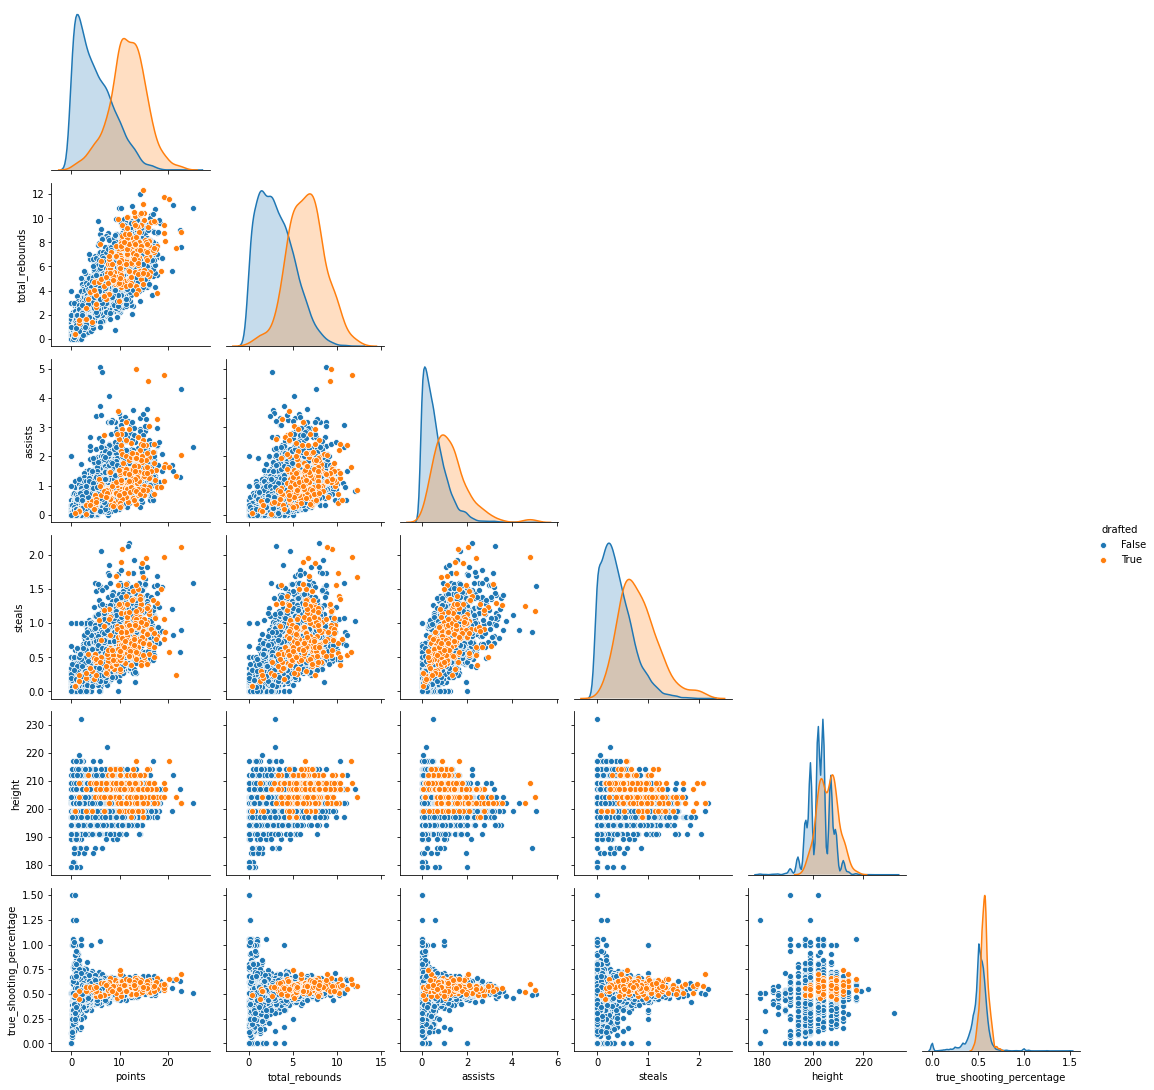

In [38]:
sns.pairplot(df.loc[df["position"] == 'Forward'][["points",'total_rebounds', "assists", "steals","height",'true_shooting_percentage',"drafted"]],corner = True, hue = "drafted")

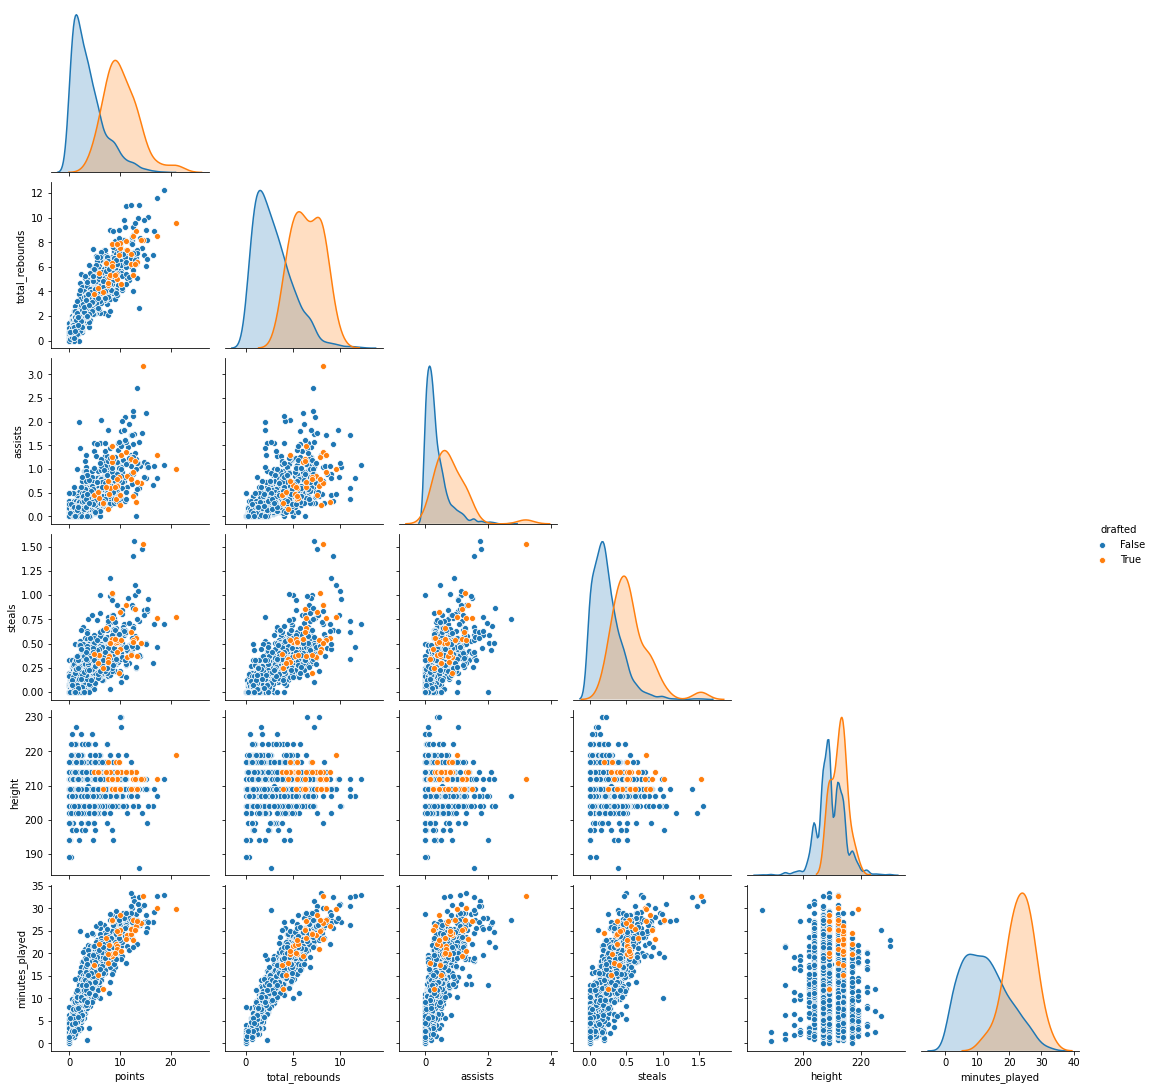

In [49]:
sns.pairplot(df.loc[df["position"] == 'Center'][["points",'total_rebounds', "assists", "steals","height","minutes_played","drafted"]],corner = True, hue = "drafted")

### Stats Avancées

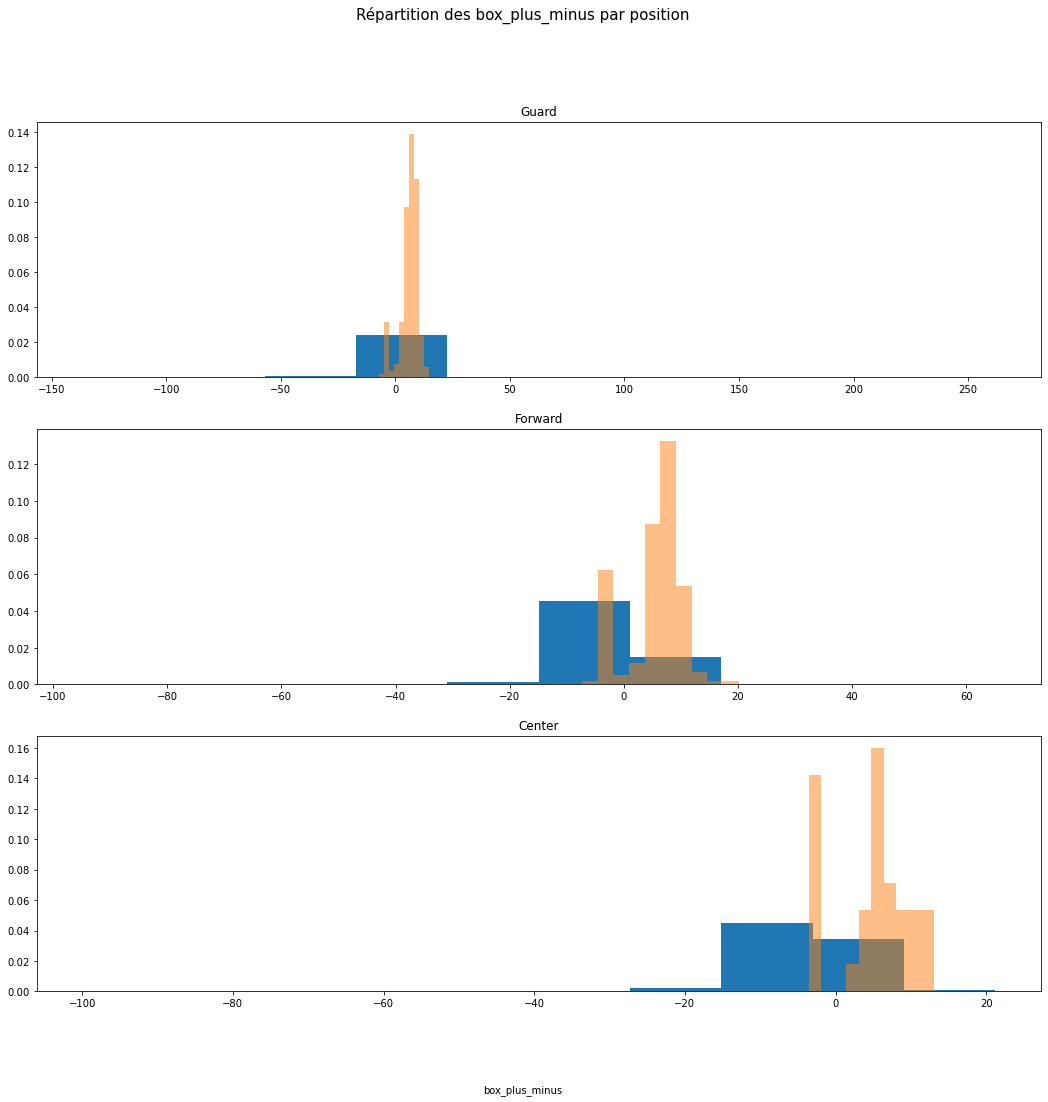

In [45]:
comparer_ncaa_drafted('box_plus_minus')

In [46]:
df.info()
# box_plus_minus effective_field_goal_percentage win_shares minutes_played player_efficiency_rating 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20549 entries, 0 to 20548
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_id                        20549 non-null  object 
 1   name                             20549 non-null  object 
 2   Season                           20549 non-null  object 
 3   assist_percentage                20549 non-null  float64
 4   assists                          20549 non-null  float64
 5   block_percentage                 20549 non-null  float64
 6   blocks                           20549 non-null  float64
 7   box_plus_minus                   20549 non-null  float64
 8   defensive_box_plus_minus         20549 non-null  float64
 9   defensive_rebound_percentage     20549 non-null  float64
 10  defensive_rebounds               20549 non-null  float64
 11  defensive_win_shares             20549 non-null  float64
 12  effective_field_go

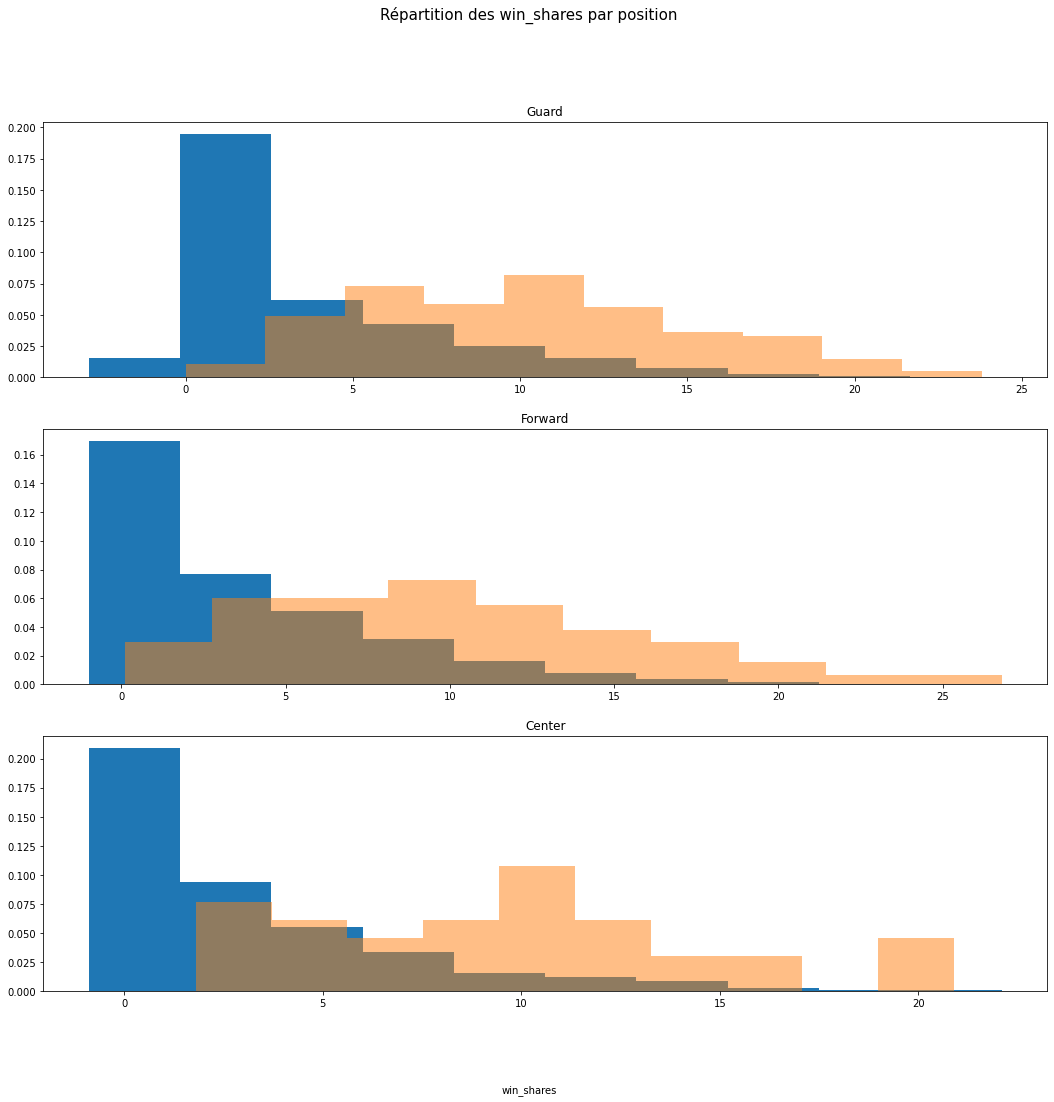

In [51]:
comparer_ncaa_drafted("win_shares")